**Task 5:** Text Analytics using NLP

- User Story: User should be able to upload pdf. Application/solution should be able to read the content of pdf and

- summarize the content into 500 words. Please use “Operations Management.pdf” as input pdf.

In [43]:
!pip install PyMuPDF nltk


In [44]:
import fitz  # PyMuPDF
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [45]:
# Step 1: Open the PDF file 
pdf_file = "Operations Management.pdf"
doc = fitz.open(pdf_file)


In [46]:
# Step 2: Extract text from each page
text = ""
for page_num in range(len(doc)):
    page = doc.load_page(page_num)
    text += page.get_text()


In [47]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [48]:

# Step 3: Tokenize the text into sentences
sentences = sent_tokenize(text)


In [49]:
# Step 4: Tokenize the text into words
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)


In [50]:
# Step 5: Remove stopwords
stop_words = set(stopwords.words("english"))
filtered_words = [word for word in words if word.lower() not in stop_words]



In [51]:
# Step 6: Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]


In [53]:
# Step 7: Create a summary of 500 words
word_count = 0
summary = []
for sentence in sentences:
    words_in_sentence = tokenizer.tokenize(sentence)
    words_in_sentence = [word for word in words_in_sentence if word.lower() not in stop_words]
    lemmatized_sentence = [lemmatizer.lemmatize(word) for word in words_in_sentence]
    if word_count + len(lemmatized_sentence) <= 500:
        summary.append(sentence)
        word_count += len(lemmatized_sentence)
    else:
        break

summary_text = ' '.join(summary)

In [54]:
# Print or use summary_text as needed
print("Summary:")
print(summary_text)

Summary:
Operations Management: Oil and Gas
Report
Introduction
Operations management is a branch of management that deals with the
designing and supervision of operational processes in a business organization. Operations management covers the responsibility over all processes that involve
the production of goods and services as well as the delivery of such productions
to the final consumers. In its duties, an operations management department ensures that processes are
planned for and executed in an efficient and effective way to satisfy the needs of
the organization and its customers. This paper seeks to discuss concepts of
operations management. The paper will look into the history, functions, case studies, advantages,
disadvantages and factors that affect the department among others. The paper
will then look into the operations management’s involvement in oil and gas
companies. Operations Management
Business enterprises entail the provision of goods and services to their
immediate c

In [ ]:

## To print most common words and plot uing the word cloud 

In [57]:
# Calculate frequency distribution
freq_dist = FreqDist(lemmatized_words)
most_common_words = freq_dist.most_common(10)
most_common_words




[('management', 136),
 ('operation', 110),
 ('process', 80),
 ('organization', 67),
 ('production', 59),
 ('also', 42),
 ('customer', 36),
 ('resource', 35),
 ('activity', 28),
 ('need', 26)]

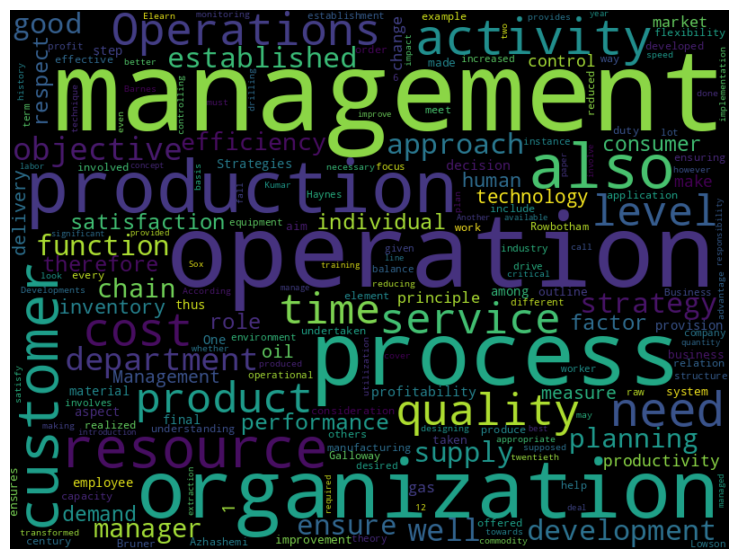

In [55]:
#  Generate and display the word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=600, background_color="black").generate_from_frequencies(freq_dist)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [56]:
#  Close the PDF file
doc.close()